<a href="https://colab.research.google.com/github/nkr9/Deep-learning-experiment/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load dataset
df = pd.read_csv("/content/Churn_Modelling (1).csv")

In [3]:
# Step 2: Data Preprocessing
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)

<ipython-input-3-20bb2636b078>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)


In [4]:
# Encode categorical features
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Female=0, Male=1
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [5]:
# Step 3: Feature and Target Separation
X = df.drop('Exited', axis=1).values
y = df['Exited'].values


In [6]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [7]:
# Step 5: Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 6: ANN Model Design
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output Layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Step 7: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [10]:
# Step 8: Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4794 - loss: 0.7760 - val_accuracy: 0.8032 - val_loss: nan
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7999 - loss: 0.4834 - val_accuracy: 0.8107 - val_loss: nan
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8086 - loss: 0.4426 - val_accuracy: 0.8201 - val_loss: nan
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8222 - loss: 0.4162 - val_accuracy: 0.8307 - val_loss: nan
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8354 - loss: 0.3866 - val_accuracy: 0.8357 - val_loss: nan
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.3769 - val_accuracy: 0.8438 - val_loss: nan
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8485 - loss: 0.3671 - val_accuracy: 0.8476 - val_loss: nan
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8487 - loss: 0.3655 - val_accuracy: 0.8476 - val_loss: nan


In [11]:
# Step 9: Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: nan
Test Accuracy: 0.86


In [13]:
# Optional: Classification Report
from sklearn.metrics import confusion_matrix, classification_report

# After model prediction
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Confusion Matrix:
 [[1527   72]
 [ 199  203]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1599
           1       0.74      0.50      0.60       402

    accuracy                           0.86      2001
   macro avg       0.81      0.73      0.76      2001
weighted avg       0.86      0.86      0.85      2001



In [18]:
# Training the model and saving history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8682 - loss: 0.3230 - val_accuracy: 0.8613 - val_loss: nan
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3180 - val_accuracy: 0.8570 - val_loss: nan
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8733 - loss: 0.3094 - val_accuracy: 0.8576 - val_loss: nan
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8778 - loss: 0.3057 - val_accuracy: 0.8576 - val_loss: nan
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8706 - loss: 0.3140 - val_accuracy: 0.8582 - val_loss: nan
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8734 - loss: 0.3146 - val_accuracy: 0.8601 - val_loss: nan
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3219 - val_accuracy: 0.8595 - val_loss: nan
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3105 - val_accuracy: 0.8588 - val_loss: nan


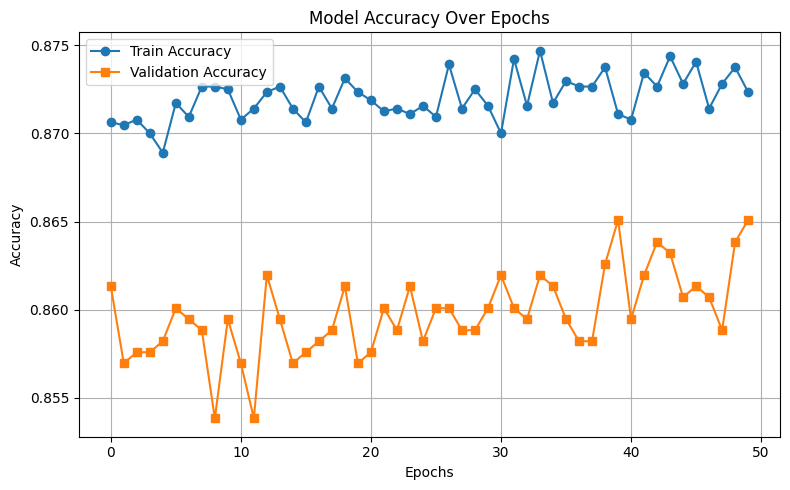

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


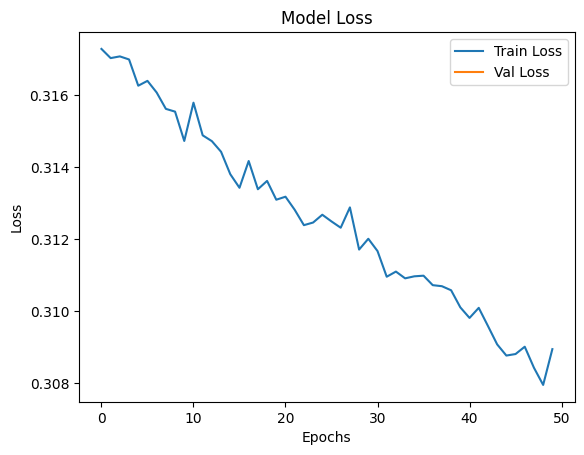

In [20]:

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()